In [222]:
from numpy import exp, linspace, random, std, mean, log10, ceil, diag, sqrt, e, power,array, log
import math
import matplotlib.pyplot  as plt
from scipy.special import factorial
import pandas as pd
from scipy.optimize import curve_fit
from scipy.constants import e as q
from scipy.stats import linregress

# Informe de medicion de la constante de Boltzmann:

#### David García Gómez
#### Juan Montoya Sánchez

## Resumen
En este informe de medición de la constante de Boltzmann se presenta un análisis de cómo cambia el voltaje y la corriente en un circuito cuando pasa a través de un semiconductor (diodo). Se utiliza un modelo exponencial para ajustar los datos y se calcula la constante de Boltzmann, junto con su incertidumbre utilizando diferentes métodos. Además, se realiza un análisis de los residuos para evaluar la calidad del ajuste. Los resultados obtenidos se comparan con el valor teórico de la constante de Boltzmann para determinar la precisión de la medición. 

## Introducción

La constante de Boltzmann es una constante física fundamental que se utiliza para relacionar la temperatura de un sistema con la energía térmica de sus partículas. Se define como el producto de la constante de los gases ideales y la constante de Avogadro, y se expresa en julios por kelvin. La constante de Boltzmann es una de las constantes físicas más importantes en la física estadística y la termodinámica. Aparece todo el tiempo en las ecuaciones relacionadas con la teoría de la radiación, como en la ley de planck para la radiación de cuerpo negro [1]. También en la física estadística juega un rol importante en como se define la entropía desde el enfoque de la física estadística y cómo se relaciona con la termodinámica clásica [2].

Las uniones p-n son las estructuras fundamentales en la electrónica, comunmente denominados como semiconductores, principalmente diodos y transistores.
En 1949 el físico estadounidense William Bradford Shockley, en un artículo publicó una fórmula que permitía relacionar la corriente con la diferencia de potencial en un diodo[3]. Caracterizando así el funcionamiento de un diodo en aplicaciones prácticas. La ecuación es la siguiente:

$$I_D=I_S(T)\left(e^{\frac{V_D}{nV_T}}-1\right)$$


Esta simplicidad de la ecuación, y su evidencia experimental, permitieron un avance monumental en los electrónicos y en el desarrollo tecnológico. De hecho, William Shockley recibiría el premio nobel en 1956 por sus aportes en la teoría de semiconductores y por la invención de los transistores[4].


Podemos entonces decir, que esta simple ecuación, fue una revolución importante en la física y en la tecnología. Y que además, relaciona directamente el valor de esta constante con parámetros que en el laboratorio podemos medir fácilmente.


En este experimento, se utilizan datos experimentales de la corriente y el voltaje en un diodo para determinar la constante de Boltzmann utilizando la ecuación de Shockley. Utilizando esta relación, se puede ajustar un modelo exponencial a los datos experimentales y determinar la constante de Boltzmann a partir de los parámetros ajustados. También realizando una regresión lineal a los datos que tienen forma exponencial y hallando la pendiente de la recta ajustada.


## Desarrollo Experimental

Se nos entrego un conjunto de elementos para montar un circuito con un diodo, una resistencia y una fuente de voltaje. Se nos pidió que midieramos la corriente y el voltaje en el diodo para diferentes valores de voltaje entregado por una fuente. 

### Evidencia fotográfica de los equipos usados: 

![Instrumentos usados:](1.jpeg)


Se utilizaron:


-2 Multímetros


-1 Una fuente de voltaje variable


-1 Protoboard


-1 Resistencia de 10 ohm

-Varios banana cables y cables de protoboard

-Diodo 1N4007

-Diodo 1N4148

Se conectó el diodo en serie con la resistencia, después, para medir el voltaje, se conectó en paralelo con el diodo, y el otro multímetro en serie al final de la cadena para medir el amperaje.


![Montaje](2.jpeg)


Se tomaron datos del amperaje y el voltaje en el diodo, usando los multímetros, y cambiando de 0.025 en 0.025 el voltaje entregado por la fuente, así, se buscaba reconstruir una gráfica que diera evidencia de la fórmula de Shockley. Se tomaron dos muestras de datos para cada diodo.

Los datos obtenidos son:

## Datos del primer Diodo (1N4007):

### Primera muestra:

In [223]:
## Cargamos los datos:
df1 = pd.read_csv('csvs/Datos1.csv')
df2 = pd.read_csv('csvs/Datos2.csv')
#df1 = pd.concat([df1, df2], ignore_index=True)
df1.sort_values(by='Fuente[V]', ascending=True, inplace=True)
df1['T[K]'] = df1['T[°C]'] + 273.15
df1['Voltimetro[V]'] = df1['Voltimetro[mV]']/1000
df1['Amperimetro[A]'] = df1['Amperimetro[mA]']/1000
df1.head()

Fuente[V]  Voltimetro[mV]  Amperimetro[mA]  T[°C]    T[K]  Voltimetro[V]  \
0      0.400           397.7             0.01   29.1  302.25         0.3977   
1      0.425           422.7             0.02   29.1  302.25         0.4227   
2      0.450           446.9             0.04   29.1  302.25         0.4469   
3      0.475           471.8             0.06   29.1  302.25         0.4718   
4      0.500           495.5             0.11   29.1  302.25         0.4955   

   Amperimetro[A]  
0         0.00001  
1         0.00002  
2         0.00004  
3         0.00006  
4         0.00011

In [224]:
##Creamos una lista de los errores de cada instrumento

deltas = [0.025,0.001,0.01,0.00001] # fuente, voltimetro, amperimetro y temperatura


Graficamos la curva V-I. Ademas emplearemos un modelo exponencial de la forma:
$$ I = ae^{Vb}$$
Donde I es la corriente medida por el amperimetro y V es el voltaje del voltimetro. a y b son los parametros a ajustar, donde a es la corriente de saturacion de la ecuacion del diodo ideal y b será $q/Tk_{b}n$. Siendo la temperatura en Kelvin, $k_{b}$ la constante de Boltzmann y $n$ el factor de idealidad (igual a 2 para el silicio). Encontraremos $k_{b}$ para cada medida con su respectiva incerteza.

$$ \frac{I}{a} = e^{V\frac{q}{Tk_{b}n}}$$
$$ \ln(\frac{I}{a}) = V\frac{q}{Tk_{b}n} $$
$$ k_{b} = \frac{Vq}{Tnln(\frac{I}{a})}$$

Aqui tomamos a q como la carga del electron.

Vamos a hacer una gráfica del voltaje contra la corriente para visualizar los datos obtenidos con el primer diodo:

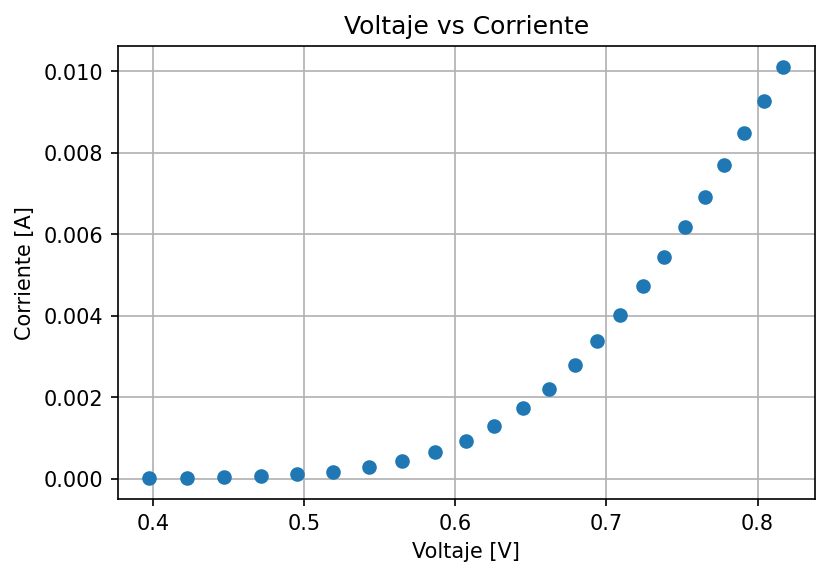

In [225]:
x = df1['Voltimetro[V]'].iloc[:-1]
y = df1['Amperimetro[A]'].iloc[:-1]
plt.figure(dpi=150)
plt.plot(x,y,'o')
#plt.plot(df1['Voltimetro[V]'],corriente(df1['Voltimetro[V]'], 0.01, 0.008))
plt.title('Voltaje vs Corriente')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.grid()
plt.show()

Procedemos a graficar los datos y ajustar la curva exponencial.

In [226]:
# Definimos la función para ajustar los parámetros a y b
def corriente(V, a, b):
    V = array(V)  
    return a*exp(b*V)


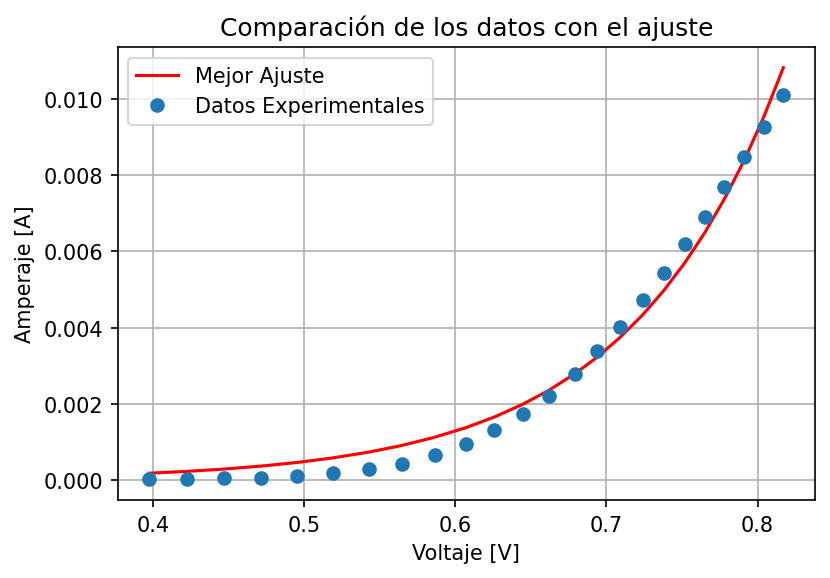

In [227]:
mej_val, cov = curve_fit(f = corriente, xdata= x , ydata= y)
#print('mej_val: {}'.format(mej_val))
#print('-------------------')
#print(cov)
#print('-------------------')
perr = sqrt(diag(cov))
#print(perr)
plt.figure(dpi=150)
# Suponiendo que la función corriente toma x y los parámetros como un array
yaj = corriente(x, mej_val[0], mej_val[1])
plt.plot(x, yaj, 'r', label='Mejor Ajuste')
plt.plot(x, y, 'o', label='Datos Experimentales')
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
plt.title('Comparación de los datos con el ajuste')
plt.legend(loc='best')
plt.grid(True)
plt.show()


La gráfica anterior compara la curva que mejor se ajusta a los datos usando curve_fit.

Obtenemos los siguientes resultados para los parametros a y b que se ajustaron:

In [228]:
print('El valor de a es: {:.1e} ± {:.1e} '.format(mej_val[0],perr[0]))
print('El valor de b es: {:.1e} ± {:.1e} '.format(mej_val[1],perr[1]))

El valor de a es: 3.5e-06 ± 1.0e-06 
El valor de b es: 9.8e+00 ± 3.7e-01 


Creamos una funcion para calcular la constante de Boltzmann con su respectiva incerteza.

In [229]:
def k_boltz(V, I, T, a):
    return q/2 * V/(T * log(I/a))

def del_k_boltz(V, I, T, a, delV = deltas[1], delI = deltas[2], delT = deltas[3], dela = perr[0]):
    
    num = delV*T*log(I/a) - V*T*(delI*a - dela*I)/(I*a) - V*delT*log(I/a)
    den = (T*log(I/a))**2
    return q/2 * num/den

Evaluamos la constante de Boltzmann para cada medida y obtenemos los siguientes resultados:

In [230]:
df1['K_boltz'] = k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1['del_k_b']= del_k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1.head()

Fuente[V]  Voltimetro[mV]  Amperimetro[mA]  T[°C]    T[K]  Voltimetro[V]  \
0      0.400           397.7             0.01   29.1  302.25         0.3977   
1      0.425           422.7             0.02   29.1  302.25         0.4227   
2      0.450           446.9             0.04   29.1  302.25         0.4469   
3      0.475           471.8             0.06   29.1  302.25         0.4718   
4      0.500           495.5             0.11   29.1  302.25         0.4955   

   Amperimetro[A]       K_boltz       del_k_b  
0         0.00001  1.000218e-22 -9.488418e-20  
1         0.00002  6.412929e-23 -1.834355e-20  
2         0.00004  4.854121e-23 -4.967386e-21  
3         0.00006  4.394385e-23 -2.569260e-21  
4         0.00011  3.804698e-23 -9.988083e-22

In [231]:
# Imprimimos el valor de medio de  la constante de bolztmann y su incertidumbre
mean_value = mean(df1['K_boltz'])
err_value = mean(df1['del_k_b'])

print('El valor de la constante de Boltzmann obtenido es: {:.1e} ± {:.1e}'.format(mean_value, abs(err_value)))

El valor de la constante de Boltzmann obtenido es: 3.4e-23 ± 4.9e-21


Podemos ver que el valor obtenido para la constante de Boltzmann es de 3.4e-23 J/K, el cual es distante del valor teorico de 1.38e-23 J/K. Esto puede deberse a errores en la toma de datos o en el ajuste de la curva exponencial. Para evaluar la calidad del ajuste, calculamos los residuos y los graficamos. Pero desde ya podemos ver que no fue un valor muy preciso puesto que tiene un error relativo del 160%.

In [232]:

# Calcular los residuos (diferencia entre los valores observados y los ajustados)
residuals = y - yaj

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de Residuo Cero')
plt.title('Gráfica de Residuos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

No podemos aplicar el test de bondad de chi cuadrado debido a que no podemos asegurar que en cada bin queden por lo menos 5 datos, además, vemos que el valor obtenido es del mismo orden que $K_B$ sin embargo, no es un dato tan cercano.

Lo que vamos a hacer, es linearizar los datos. Luego descartaremos los datos que no sigan un patron lineal, y luego encontrando la pendiente de la recta obtendremos el valor de $K_B$. Luego usaremos el coeficiente de coorelacion r^2 para ver que tan bueno es el ajuste lineal respecto a los datos.

## Ajuste de los datos linealizados

En este caso vamos a realizar el ajuste linealizando los datos dado que no podemos usar la prueba de bondad de chi cuadrado para el ajuste exponencial. Para esto, tomamos el logaritmo natural de la corriente y ajustamos una recta a los datos. Para usar las funciones de la primera parte, nos interesa conseguir la pendiente del ajuste.

Ahora realizamos un filtrado de los datos que tienen un residuo mayor a 0.0004 para realizar una regresión lineal de los datos. Como explicamos anteriormente, no se puede realizar un test de bondad con chi cuadrado, por lo que realizaremos una regresión lineal con los datos que más se ajustan al modelo exponencial y utilizaremos el coeficiente de coorelación r^2 para medir la bondad de los datos obtenidos.

In [233]:
xl=[]
yl=[]
for i in range(len(residuals)):
    if abs(residuals[i])<0.0004:
        xl.append(x[i])
        yl.append(y[i])
plt.figure(dpi=150)      
plt.title("Datos filtrados")
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
#print(xl)
#print(yl)
plt.plot(xl,yl,"o")
    

Con los datos filtrados aplicaremos el siguiente proceso:


$$ I = ae^{Vb}$$
$$ \ln(I) =  Vb +\ln(a) $$

Así, en vez de una curva exponencial tenemos una recta con pendiente $b$ e intercepto $\ln(a)$

Donde habiamos visto anteriormente que
$$b =\frac{q}{T K_B n} $$
 Por lo que podemos despejar y obtener:
 
 $$K_B=\frac{q}{Tbn}$$
 
 donde b es la pendiente de la recta ajustada.
 
 
 Procedemos entonces a realizar la regresión lineal:

In [234]:
# Calcular el logaritmo natural de las corrientes
ln_y = log(yl)
x = log(xl)

# Realizar una regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, ln_y)
# Calcula el error estándar del intercepto
n = len(x)
intercept_stderr = std_err * sqrt(sum((x - mean(x))**2) / n)

# Crear una función para modelar el ajuste lineal
def model(x):
    return slope * x + intercept

# Calcular los valores ajustados de y para la línea de ajuste
fit_y = model(x)

# Graficar los datos y la línea de ajuste
plt.figure(dpi=150)
plt.scatter(x, ln_y, color='blue', label='Datos experimentales')
plt.plot(x, fit_y, color='red', label='Ajuste lineal')
plt.title('Ajuste Lineal de los Datos Logarítmicos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Logaritmo Natural de la Corriente (ln(A))')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los resultados del ajuste
print(f"Slope (Pendiente): {slope}")
print(f"Intercept (Intersección): {intercept}")
print(f"Coefficient of determination (r^2): {r_value**2}")
print(f"Standard error of the estimate (Error estándar del ajuste): {std_err}")


Slope (Pendiente): 9.895894197988085
Intercept (Intersección): -2.2077227239841326
Coefficient of determination (r^2): 0.9950577778405405
Standard error of the estimate (Error estándar del ajuste): 0.1934284491048


 La gráfica anterior nos muestra la pendiente obtenida, el intercepto y el coeficiente r^2. Veamos cuanto nos da la constante de Boltzmann para la pendiente obtenida

In [235]:
def k_blineal(b,T,n):
    return q/(T*b*n)
print("El valor medido para la constante de Boltzmann es:",k_blineal(slope,df1['T[K]'][1],2))


El valor medido para la constante de Boltzmann es: 2.678298913633217e-23


Podemos ver que el ajuste es más cercano que usando el modelo exponencial y hallando el valor medio para cada valor. Además con este método también tenemos que el coeficiente de r^2 es de 0.99, lo que indica que los datos experimentales y el ajuste tienen una muy buena coorelación, lo que no nos brinda el método exponencial debido la imposibilidad de realizar el test de chi cuadrado.

Este proceso se repetira para la segunda muestra del primer diodo y para las dos muestras del segundo diodo


### Segunda muestra:

Volvemos a cargar los datos para que no se confundan con los datos anteriores:

In [236]:
## Cargamos los datos:
df2 = pd.read_csv('csvs/Datos1.csv')
df1 = pd.read_csv('csvs/Datos2.csv')
#df1 = pd.concat([df1, df2], ignore_index=True)
df1.sort_values(by='Fuente[V]', ascending=True, inplace=True)
df1['T[K]'] = df1['T[°C]'] + 273.15
df1['Voltimetro[V]'] = df1['Voltimetro[mV]']/1000
df1['Amperimetro[A]'] = df1['Amperimetro[mA]']/1000
df1.head()

Fuente[V]  Voltimetro[mV]  Amperimetro[mA]  T[°C]    T[K]  Voltimetro[V]  \
0      0.400           397.8             0.02   29.1  302.25         0.3978   
1      0.425           422.5             0.02   29.1  302.25         0.4225   
2      0.450           446.8             0.03   29.1  302.25         0.4468   
3      0.475           471.6             0.06   29.1  302.25         0.4716   
4      0.500           495.0             0.11   29.1  302.25         0.4950   

   Amperimetro[A]  
0         0.00002  
1         0.00002  
2         0.00003  
3         0.00006  
4         0.00011

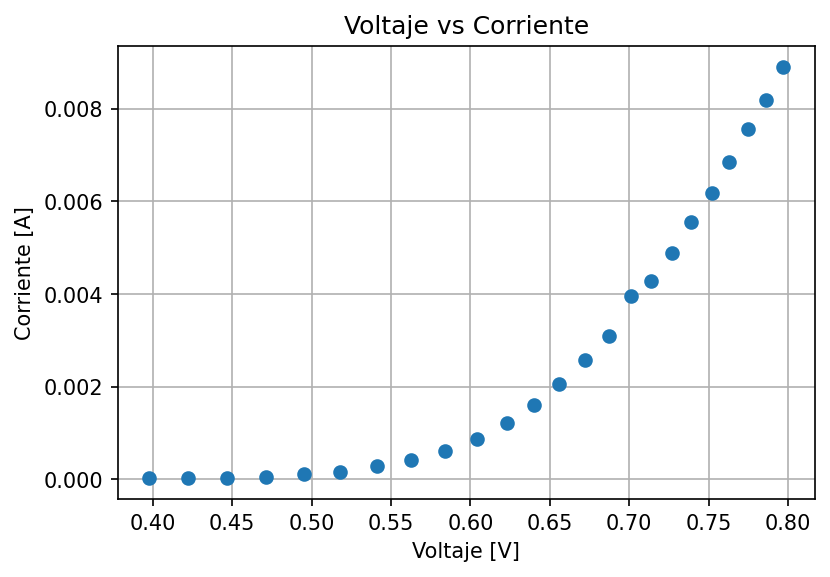

In [237]:
x = df1['Voltimetro[V]'].iloc[:-1]
y = df1['Amperimetro[A]'].iloc[:-1]
plt.figure(dpi=150)
plt.plot(x,y,'o')
#plt.plot(df1['Voltimetro[V]'],corriente(df1['Voltimetro[V]'], 0.01, 0.008))
plt.title('Voltaje vs Corriente')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.grid()
plt.show()

Realizamos el ajuste con el modelo exponencial:

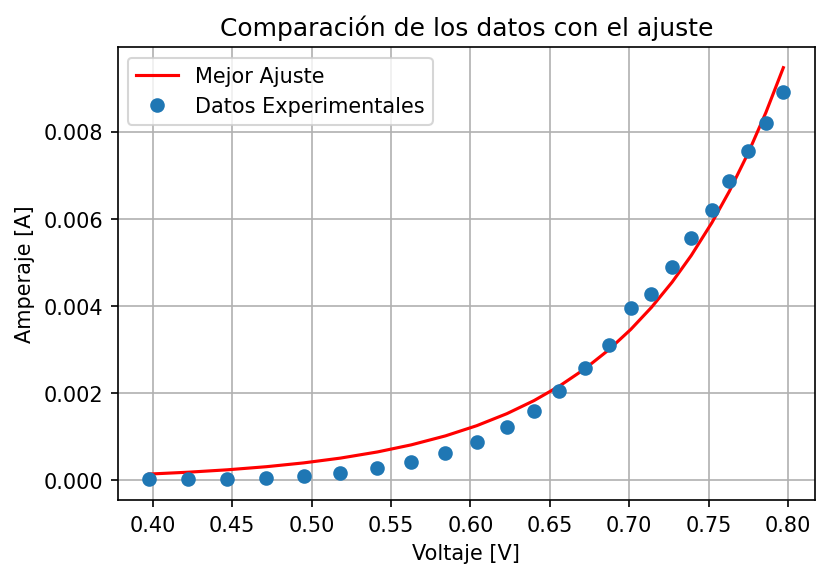

In [238]:
mej_val, cov = curve_fit(f = corriente, xdata= x , ydata= y)
#print('mej_val: {}'.format(mej_val))
#print('-------------------')
#print(cov)
#print('-------------------')
perr = sqrt(diag(cov))
#print(perr)
plt.figure(dpi=150)
# Suponiendo que la función corriente toma x y los parámetros como un array
yaj = corriente(x, mej_val[0], mej_val[1])
plt.plot(x, yaj, 'r', label='Mejor Ajuste')
plt.plot(x, y, 'o', label='Datos Experimentales')
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
plt.title('Comparación de los datos con el ajuste')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Calculamos el valor de la constante de Boltzmann para cada valor:

In [239]:
df1['K_boltz'] = k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1['del_k_b']= del_k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1.head()

Fuente[V]  Voltimetro[mV]  Amperimetro[mA]  T[°C]    T[K]  Voltimetro[V]  \
0      0.400           397.8             0.02   29.1  302.25         0.3978   
1      0.425           422.5             0.02   29.1  302.25         0.4225   
2      0.450           446.8             0.03   29.1  302.25         0.4468   
3      0.475           471.6             0.06   29.1  302.25         0.4716   
4      0.500           495.0             0.11   29.1  302.25         0.4950   

   Amperimetro[A]       K_boltz       del_k_b  
0         0.00002  4.823273e-23 -1.102257e-20  
1         0.00002  5.122757e-23 -1.170698e-20  
2         0.00003  4.569755e-23 -5.870146e-21  
3         0.00006  3.805507e-23 -1.925773e-21  
4         0.00011  3.372046e-23 -7.839777e-22

Realizamos la media de todos los valores y calculamos su respectiva incerteza:

In [240]:
# Imprimimos el valor de medio de  la constante de bolztmann y su incertidumbre
mean_value = mean(df1['K_boltz'])
err_value = mean(df1['del_k_b'])

print('El valor de la constante de Boltzmann obtenido es: {:.1e} ± {:.1e}'.format(mean_value, abs(err_value)))
print('El valor de la constante de Boltzmann es: {:.1e}'.format(k))
print('El error relativo es: {:.1e}'.format(abs(mean_value - k)/k))

El valor de la constante de Boltzmann obtenido es: 3.0e-23 ± 1.3e-21
El valor de la constante de Boltzmann es: 1.4e-23
El error relativo es: 1.1e+00


Veamos la gráfica de los residuos:

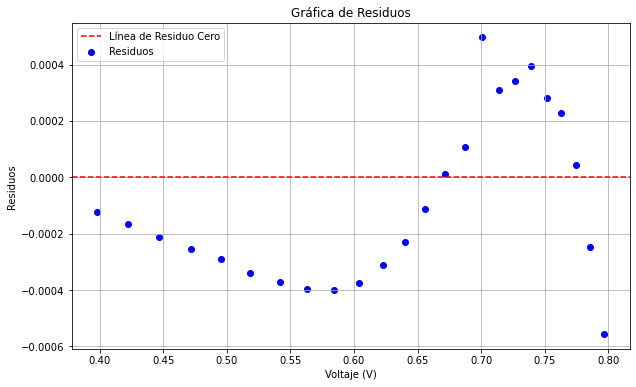

In [241]:

# Calcular los residuos (diferencia entre los valores observados y los ajustados)
residuals = y - yaj

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de Residuo Cero')
plt.title('Gráfica de Residuos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

En este caso el valor de la constante de Boltzmann mejoró en algunas décimas, sin embargo sigue siendo una aproximación bastante escueta.

Realizamos el filtrado de datos para hacer la regresión lineal:

In [242]:
xl=[]
yl=[]
for i in range(len(residuals)):
    if abs(residuals[i])<0.0004:
        xl.append(x[i])
        yl.append(y[i])
plt.figure(dpi=150)      
plt.title("Datos filtrados")
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
#print(xl)
#print(yl)
plt.plot(xl,yl,"o")
    

Vemos que hay más datos que cumplen el requisito de filtrado que en el proceso de la primera muestra. Realizamos la regresión lineal:

In [243]:
# Calcular el logaritmo natural de las corrientes
ln_y = log(yl)
x = log(xl)

# Realizar una regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, ln_y)
# Calcula el error estándar del intercepto
n = len(x)
intercept_stderr = std_err * sqrt(sum((x - mean(x))**2) / n)

# Crear una función para modelar el ajuste lineal
def model(x):
    return slope * x + intercept

# Calcular los valores ajustados de y para la línea de ajuste
fit_y = model(x)

# Graficar los datos y la línea de ajuste
plt.figure(dpi=150)
plt.scatter(x, ln_y, color='blue', label='Datos experimentales')
plt.plot(x, fit_y, color='red', label='Ajuste lineal')
plt.title('Ajuste Lineal de los Datos Logarítmicos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Logaritmo Natural de la Corriente (ln(A))')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los resultados del ajuste
print(f"Slope (Pendiente): {slope}")
print(f"Intercept (Intersección): {intercept}")
print(f"Coefficient of determination (r^2): {r_value**2}")
print(f"Standard error of the estimate (Error estándar del ajuste): {std_err}")

Slope (Pendiente): 9.711448956693834
Intercept (Intersección): -2.2488363785466934
Coefficient of determination (r^2): 0.9936958139171931
Standard error of the estimate (Error estándar del ajuste): 0.17745776733043034


Con los valores hallados con esta regresión lineal encontramos que la constante de Boltzmann es:

In [244]:
print("El valor medido para la constante de Boltzmann es:",k_blineal(slope,df1['T[K]'][1],2))

El valor medido para la constante de Boltzmann es: 2.729166656601964e-23


Realizamos ahora todo este proceso para las dos muestras del segundo diodo:

## Diodo 1N4148:

### Primera muestra:

Cargamos los datos:

In [245]:
df1 = pd.read_csv('csvs/Datos1_2exp.csv')
df2 = pd.read_csv('csvs/Datos2_2exp.csv')
#df1 = pd.concat([df1, df2], ignore_index=True)
#df1.sort_values(by='Fuente [V]', ascending=True, inplace=True)
df1['T[K]'] = df1['T[°C]'] + 273.15
df1['Voltimetro[V]'] = df1['Voltímetro [mV]']/1000
df1['Amperimetro[A]'] = df1['Amperimetro [mA]']/1000
df1.head()

Fuente [V]  Voltímetro [mV]  Amperimetro [mA]  T[°C]    T[K]  \
0       0.400              402              0.01   28.8  301.95   
1       0.425              427              0.02   28.8  301.95   
2       0.450              451              0.04   28.8  301.95   
3       0.475              476              0.07   28.8  301.95   
4       0.500              498              0.14   28.8  301.95   

   Voltimetro[V]  Amperimetro[A]  
0          0.402         0.00001  
1          0.427         0.00002  
2          0.451         0.00004  
3          0.476         0.00007  
4          0.498         0.00014

Realizamos la gráfica de Voltaje vs Corriente

In [246]:
x = df1['Voltimetro[V]'].iloc[:-1]
y = df1['Amperimetro[A]'].iloc[:-1]
plt.figure(dpi=150)
plt.plot(x,y,'o')
#plt.plot(df1['Voltimetro[V]'],corriente(df1['Voltimetro[V]'], 0.01, 0.008))
plt.title('Voltaje vs Corriente')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.grid()
plt.show()

Realizamos el ajuste con el modelo exponencial:

In [247]:
mej_val, cov = curve_fit(f = corriente, xdata= x , ydata= y)
#print('mej_val: {}'.format(mej_val))
#print('-------------------')
#print(cov)
#print('-------------------')
perr = sqrt(diag(cov))
#print(perr)
plt.figure(dpi=150)
# Suponiendo que la función corriente toma x y los parámetros como un array
yaj = corriente(x, mej_val[0], mej_val[1])
plt.plot(x, yaj, 'r', label='Mejor Ajuste')
plt.plot(x, y, 'o', label='Datos Experimentales')
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
plt.title('Comparación de los datos con el ajuste')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Vemos que el ajuste es mejor que para el primer diodo. 

Realizamos la medición de la constante de Boltzmann para cada valor:

In [248]:
df1['K_boltz'] = k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1['del_k_b']= del_k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1.head()

Fuente [V]  Voltímetro [mV]  Amperimetro [mA]  T[°C]    T[K]  \
0       0.400              402              0.01   28.8  301.95   
1       0.425              427              0.02   28.8  301.95   
2       0.450              451              0.04   28.8  301.95   
3       0.475              476              0.07   28.8  301.95   
4       0.500              498              0.14   28.8  301.95   

   Voltimetro[V]  Amperimetro[A]       K_boltz       del_k_b  
0          0.402         0.00001  1.180317e-23 -2.075951e-22  
1          0.427         0.00002  1.164398e-23  4.082072e-22  
2          0.451         0.00004  1.148052e-23  6.510950e-22  
3          0.476         0.00007  1.149945e-23  7.311283e-22  
4          0.498         0.00014  1.131666e-23  7.460258e-22

Hallamos la media y su respectiva incerteza:

In [249]:
# Imprimimos el valor de medio de  la constante de bolztmann y su incertidumbre
mean_value = mean(df1['K_boltz'])
err_value = mean(df1['del_k_b'])

print('El valor de la constante de Boltzmann obtenido es: {:.1e} ± {:.1e}'.format(mean_value, abs(err_value)))
print('El valor de la constante de Boltzmann es: {:.1e}'.format(k))
print('El error relativo es: {:.1e}'.format(abs(mean_value - k)/k))

El valor de la constante de Boltzmann obtenido es: 1.2e-23 ± 6.0e-22
El valor de la constante de Boltzmann es: 1.4e-23
El error relativo es: 1.7e-01


Veamos la gráfica de residuos:

In [250]:

# Calcular los residuos (diferencia entre los valores observados y los ajustados)
residuals = y - yaj

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de Residuo Cero')
plt.title('Gráfica de Residuos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

Filtramos los datos:

In [251]:
xl=[]
yl=[]
for i in range(len(residuals)):
    if abs(residuals[i])<0.0004:
        xl.append(x[i])
        yl.append(y[i])
plt.figure(dpi=150)      
plt.title("Datos filtrados")
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
#print(xl)
#print(yl)
plt.plot(xl,yl,"o")
    

En este caso los residuos todos son menores que 0.0004, por lo que se conservan todos los valores para realizar la regresión lineal:

In [252]:
# Calcular el logaritmo natural de las corrientes
ln_y = log(yl)
x = log(xl)

# Realizar una regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, ln_y)
# Calcula el error estándar del intercepto
n = len(x)
intercept_stderr = std_err * sqrt(sum((x - mean(x))**2) / n)

# Crear una función para modelar el ajuste lineal
def model(x):
    return slope * x + intercept

# Calcular los valores ajustados de y para la línea de ajuste
fit_y = model(x)

# Graficar los datos y la línea de ajuste
plt.figure(dpi=150)
plt.scatter(x, ln_y, color='blue', label='Datos experimentales')
plt.plot(x, fit_y, color='red', label='Ajuste lineal')
plt.title('Ajuste Lineal de los Datos Logarítmicos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Logaritmo Natural de la Corriente (ln(A))')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los resultados del ajuste
print(f"Slope (Pendiente): {slope}")
print(f"Intercept (Intersección): {intercept}")
print(f"Coefficient of determination (r^2): {r_value**2}")
print(f"Standard error of the estimate (Error estándar del ajuste): {std_err}")

Slope (Pendiente): 12.998327463480994
Intercept (Intersección): 0.14412253043146173
Coefficient of determination (r^2): 0.9976181620290568
Standard error of the estimate (Error estándar del ajuste): 0.13243338797608345


Con la pendiente de la regresión lineal hallamos la constante de Boltzmann:

In [253]:
print("El valor medido para la constante de Boltzmann es:",k_blineal(slope,df1['T[K]'][1],2))

El valor medido para la constante de Boltzmann es: 2.0410699570871903e-23


### Segunda muestra:


Cargamos los datos de la segunda muestra:

In [254]:
df2 = pd.read_csv('csvs/Datos1_2exp.csv')
df1 = pd.read_csv('csvs/Datos2_2exp.csv')
#df1 = pd.concat([df1, df2], ignore_index=True)
#df1.sort_values(by='Fuente [V]', ascending=True, inplace=True)
df1['T[K]'] = df1['T[°C]'] + 273.15
df1['Voltimetro[V]'] = df1['Voltímetro [mV]']/1000
df1['Amperimetro[A]'] = df1['Amperimetro [mA]']/1000
df1.head()

Fuente [V]  Voltímetro [mV]  Amperimetro [mA]  T[°C]    T[K]  \
0       0.400              402              0.01   27.8  300.95   
1       0.425              427              0.01   27.8  300.95   
2       0.450              451              0.02   27.8  300.95   
3       0.475              476              0.05   27.8  300.95   
4       0.500              500              0.09   27.8  300.95   

   Voltimetro[V]  Amperimetro[A]  
0          0.402         0.00001  
1          0.427         0.00001  
2          0.451         0.00002  
3          0.476         0.00005  
4          0.500         0.00009

Realizamos la gráfica:

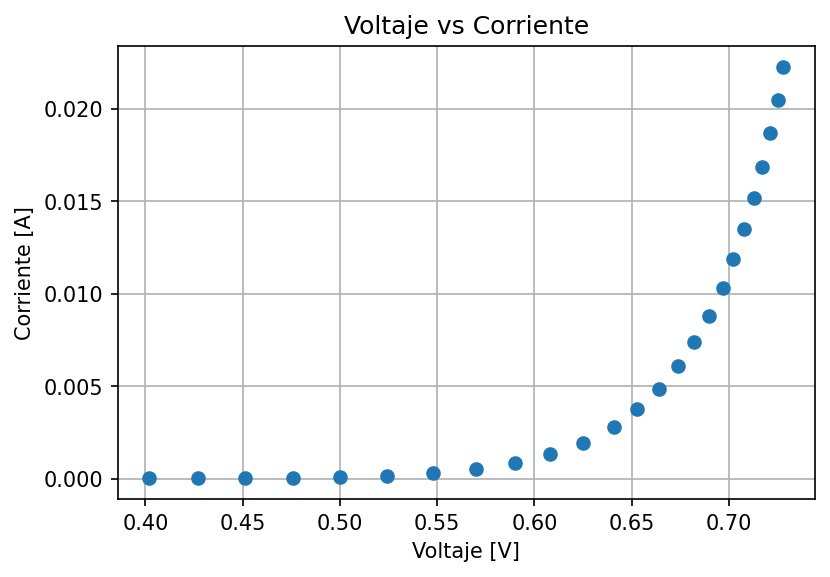

In [255]:
x = df1['Voltimetro[V]'].iloc[:-1]
y = df1['Amperimetro[A]'].iloc[:-1]
plt.figure(dpi=150)
plt.plot(x,y,'o')
#plt.plot(df1['Voltimetro[V]'],corriente(df1['Voltimetro[V]'], 0.01, 0.008))
plt.title('Voltaje vs Corriente')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.grid()
plt.show()

Realizamos el ajuste con el modelo exponencial:

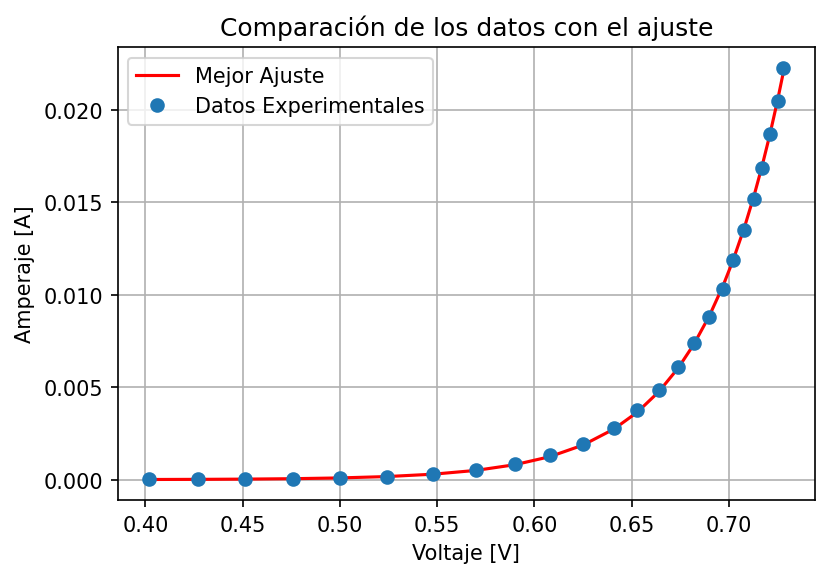

In [256]:
mej_val, cov = curve_fit(f = corriente, xdata= x , ydata= y)
#print('mej_val: {}'.format(mej_val))
#print('-------------------')
#print(cov)
#print('-------------------')
perr = sqrt(diag(cov))
#print(perr)
plt.figure(dpi=150)
# Suponiendo que la función corriente toma x y los parámetros como un array
yaj = corriente(x, mej_val[0], mej_val[1])
plt.plot(x, yaj, 'r', label='Mejor Ajuste')
plt.plot(x, y, 'o', label='Datos Experimentales')
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
plt.title('Comparación de los datos con el ajuste')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Realizamos el cálculo de la constante de Boltzmann para cada valor:

In [257]:
df1['K_boltz'] = k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1['del_k_b']= del_k_boltz(df1['Voltimetro[V]'], df1['Amperimetro[A]'], df1['T[K]'], mej_val[0])
df1.head()

Fuente [V]  Voltímetro [mV]  Amperimetro [mA]  T[°C]    T[K]  \
0       0.400              402              0.01   27.8  300.95   
1       0.425              427              0.01   27.8  300.95   
2       0.450              451              0.02   27.8  300.95   
3       0.475              476              0.05   27.8  300.95   
4       0.500              500              0.09   27.8  300.95   

   Voltimetro[V]  Amperimetro[A]       K_boltz       del_k_b  
0          0.402         0.00001  1.099017e-23  7.843014e-22  
1          0.427         0.00001  1.167364e-23  8.330747e-22  
2          0.451         0.00002  1.151035e-23  1.318635e-21  
3          0.476         0.00005  1.116731e-23  1.471293e-21  
4          0.500         0.00009  1.115260e-23  1.480054e-21

Realizamos la media y hallamos el valor usando el modelo exponencial:

In [258]:
# Imprimimos el valor de medio de  la constante de bolztmann y su incertidumbre
mean_value = mean(df1['K_boltz'])
err_value = mean(df1['del_k_b'])

print('El valor de la constante de Boltzmann obtenido es: {:.1e} ± {:.1e}'.format(mean_value, abs(err_value)))
print('El valor de la constante de Boltzmann es: {:.1e}'.format(k))
print('El error relativo es: {:.1e}'.format(abs(mean_value - k)/k))

El valor de la constante de Boltzmann obtenido es: 1.1e-23 ± 1.2e-21
El valor de la constante de Boltzmann es: 1.4e-23
El error relativo es: 1.9e-01


Vemos que el valor es más cercano, sin embargo no podemos utilizar el criterio de chi cuadrado, por lo que debemos lianizar los datos y hallar el coeficiente de coorelacion r^2. Veamos los residuos:

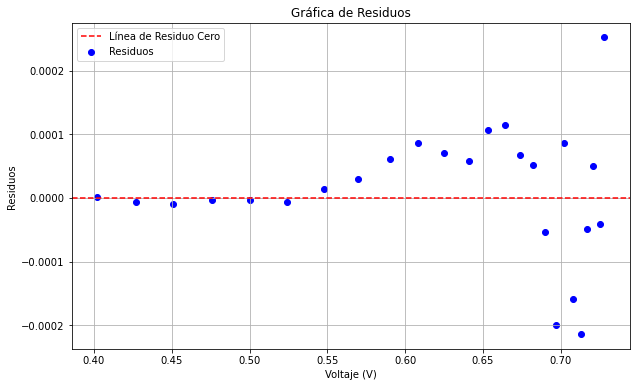

In [259]:
# Calcular los residuos (diferencia entre los valores observados y los ajustados)
residuals = y - yaj

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de Residuo Cero')
plt.title('Gráfica de Residuos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

Filtramos los datos:

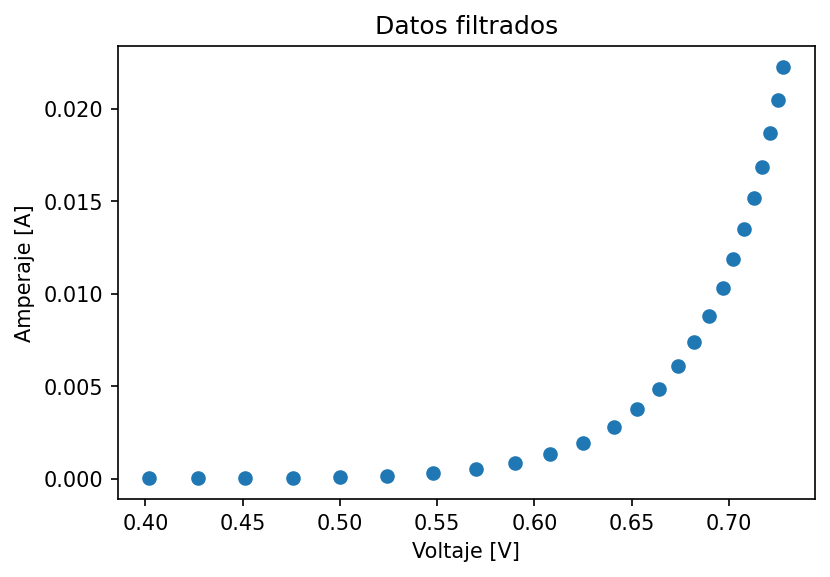

In [260]:
xl=[]
yl=[]
for i in range(len(residuals)):
    if abs(residuals[i])<0.0004:
        xl.append(x[i])
        yl.append(y[i])
plt.figure(dpi=150)      
plt.title("Datos filtrados")
plt.xlabel('Voltaje [V]')
plt.ylabel('Amperaje [A]')
#print(xl)
#print(yl)
plt.plot(xl,yl,"o")
    

Realizamos la regresión lineal:

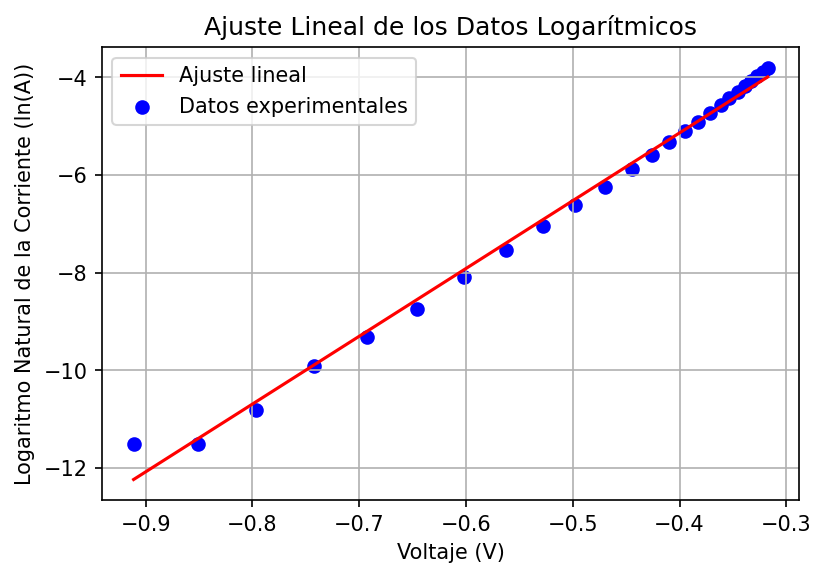

Slope (Pendiente): 13.87572735943204
Intercept (Intersección): 0.41107957582746746
Coefficient of determination (r^2): 0.9943905448420323
Standard error of the estimate (Error estándar del ajuste): 0.21730698542832283


In [261]:
# Calcular el logaritmo natural de las corrientes
ln_y = log(yl)
x = log(xl)

# Realizar una regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, ln_y)
# Calcula el error estándar del intercepto
n = len(x)
intercept_stderr = std_err * sqrt(sum((x - mean(x))**2) / n)

# Crear una función para modelar el ajuste lineal
def model(x):
    return slope * x + intercept

# Calcular los valores ajustados de y para la línea de ajuste
fit_y = model(x)

# Graficar los datos y la línea de ajuste
plt.figure(dpi=150)
plt.scatter(x, ln_y, color='blue', label='Datos experimentales')
plt.plot(x, fit_y, color='red', label='Ajuste lineal')
plt.title('Ajuste Lineal de los Datos Logarítmicos')
plt.xlabel('Voltaje (V)')
plt.ylabel('Logaritmo Natural de la Corriente (ln(A))')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los resultados del ajuste
print(f"Slope (Pendiente): {slope}")
print(f"Intercept (Intersección): {intercept}")
print(f"Coefficient of determination (r^2): {r_value**2}")
print(f"Standard error of the estimate (Error estándar del ajuste): {std_err}")

Con los datos encontrados de la regresión lineal tenemos que la constante de Boltzmann es:

In [262]:
print("El valor medido para la constante de Boltzmann es:",k_blineal(slope,df1['T[K]'][1],2))

El valor medido para la constante de Boltzmann es: 1.9183608047384963e-23


## Conclusiones

En este informe, se ha presentado un análisis detallado de los datos experimentales obtenidos en un circuito de un semiconductor utilizando la ley de Schockley. Se ha utilizado un modelo exponencial para ajustar los datos y se ha calculado la constante de Boltzmann junto con su incertidumbre utilizando diferentes métodos. Se ha realizado un análisis de los residuos para evaluar la calidad del ajuste y se han comparado los resultados obtenidos con el valor teórico de la constante de Boltzmann. En los datos del primer diodo en la primera muestra, se ha encontrado que el valor obtenido para la constante de Boltzmann  usando el modelo exponencial es de 3.4e-23 J/K, el cual es distante del valor teórico de 1.38e-23 J/K. Esto puede deberse a errores en la toma de datos. También vimos que el valor encontrado realizando la regresión lineal es de 2.6e-23, lo que es más cercano. Para la segunda muestra tenemos que para el ajuste exponencial es de 3.0e-23 y que para el ajuste lineal es de 2.7e-23. Para el primer diodo, realizando la regresión lineal obtuvimos un mejor resultado, y además tenemos como respaldo que para ambas muestras el coeficiente de coorelación r^2 fue muy cercano a 1. Lo que nos dice que el modelo utilizado es adecuado.

Para el segundo diodo, en la primera muestra obtuvimos con el modelo exponencial que el valor de la constante de Boltzmann es de 1.2e-23 lo cual es un valor muchísimo más cercano, para el modelo lineal nos dió 2.0410699570871903e-23. Para la segunda muestra, el ajuste exponencial nos dió 1.1e-23 y para el ajuste lineal nos dió 1.9e-23. Podemos ver que para el primer diodo el ajuste exponencial nos daba un valor de la constante de Boltzmann más lejano que el ajuste lineal, sin embargo para el segundo diodo es al contrario. Tanto en la primera como en la segunda muestra el ajuste exponencial dio un valor de la constante de Boltzmann más cercano. Esto pudo deberse a la presición en la toma de datos, ya que para el primer diodo fue más torpe que para el segundo diodo, lo cual pudo influir notoriamente en los valores encontrados. Sin embargo, para poder realizar un test de bondad en los valores hallados con el ajuste exponencial, tenemos que tomar más datos para asegurar que al separar los bins en el test chi cuadrado, hayan al menos 5 valores, lo que no se cumple en nuestro caso.

Esto nos dice que:

-El ajuste exponencial es más adecuado que el proceso de regresión lineal para hallar el valor de la constante de Boltzmann.

-Para realizar un test de bondad chi cuadrado se necesitan más datos. Lo cual permitiría usar el ajuste exponencial con mayor fiabilidad.


-En la toma de datos del primer diodo, en ambas muestras los residuos con el ajuste exponencial fueron notables, y se tuvieron que filtrar mucho más datos que para los datos del segundo diodo. Esto pudo ser causado por errores en la toma de datos. Lo cual también genera que al filtrar los datos, el valor hallado con el ajuste lineal sea más preciso que con el hallado con el ajuste exponencial.

-Dado que la constante de Boltzmann tiene una escala del orden de 1e-23, se necesitan muchos más datos para tener una presición mayor en su valor. Sin embargo para ser un experimento de laboratorio relativamente simple, tuvimos valores que se acercan bastante.

Bibliografía:
* [1] Rybicki, George B., y Alan P. Lightman, Radiative Processes in Astrophysics. New York: Wiley-Interscience, 1979, p. 22.


* [2] L. Boltzmann, Lectures on Gas Theory. Courier Corporation, enero 1995.



* [3] W. Shockley, "The Theory of p-n Junctions in Semiconductors and p-n Junction Transistors," The Bell System Technical Journal, vol. 28, no. 3, pp. 435-489, Jul. 1949.


* [4] [1] "The Nobel Prize in Physics 1956". [Online]. Available: https://www.nobelprize.org/prizes/physics/1956/summary/. 
